In [29]:
#Importing relevant libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [30]:
#Define the CNN model

classifier = Sequential()

classifier.add(Input(shape=(64, 64, 3)))

classifier.add(Conv2D(32, (3, 3), activation='relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [31]:
#Data augmentation and data generators

train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Deep_DataSet/Tomato Disease Classification/data/train',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')

test_set = test_datagen.flow_from_directory('C:/Deep_DataSet/Tomato Disease Classification/data/test',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')


Found 100 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [32]:
#Train the model

try:
    history = classifier.fit(
        training_set,
        steps_per_epoch=100,
        epochs=10,
        validation_data=test_set,
        validation_steps=50
    )
except AttributeError as e:
    print(f"An error occurred during training: {e}")
    

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4541 - loss: 3.8055 - val_accuracy: 0.5000 - val_loss: 2.4302
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5051 - loss: 3.8641 - val_accuracy: 0.5000 - val_loss: 0.9904
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5000 - loss: 1.4306 - val_accuracy: 0.5000 - val_loss: 2.3164
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5004 - loss: 1.6083 - val_accuracy: 0.7400 - val_loss: 0.6304
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4872 - loss: 0.9903 - val_accuracy: 0.5000 - val_loss: 1.4924
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5015 - loss: 1.0888 - val_accuracy: 0.5200 - val_loss: 0.8738
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6797 - loss: 0.5801 - val_accuracy: 0.5400 - val_loss: 0.6814
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5104 - loss: 0.6152 - val_accuracy: 0.

In [33]:
# Load and preprocess the test image

test_image = image.load_img('C:/Deep_DataSet/Tomato Disease Classification/data/disease.JPG', target_size = (64, 64))
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis = 0)
result = classifier.predict(test_image_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


In [34]:
# Make prediction

if result[0][0] == 1:
    prediction = 'Healthy'
else:
    prediction = 'Diseased'
print(prediction)


Diseased


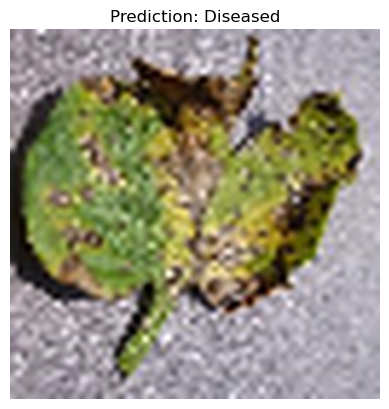

In [35]:
# Display the image being tested

test_image_array = np.squeeze(test_image_array, axis=0)

display_image = Image.fromarray(test_image_array.astype('uint8'))
display_image = display_image.resize((400,400), Image.LANCZOS)

plt.imshow(display_image)
plt.title(f'Prediction: {prediction}')
plt.axis('off')
plt.show()
